## NATURAL LANGUAUGE PROCESSING - ASSIGNMENT 1
Submission for :GROUP XXXX


Group Members:



S No |Name | BITS ID
-----|-----|----- 
1|Rakesh| XXXX
2|XXXX    |  XXXX
3|XXXX  |   XXXX

#### Description of Data: 
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


#### 1. Download the file and set it as a Dataframe. (1 Marks)
Ans: For performing this step, w eneed to install spacy with en_core_web_sm, to install en_core_web_sm, use the following command in command prompt: python -m spacy download en_core_web_sm

In [83]:
#importing the required packages
import pandas as pd
import spacy
import nlp
import nltk
from nltk.corpus import stopwords
from spacy import displacy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### 2.  Remove punctuations, special characters and stopwords from the text column. Convert the text to lower case. (3 Marks)

In [84]:
#Read Source file and set it as a Dataframe
df_read = pd.read_csv('Tweets.csv',dtype=object)
df_read['text'] .fillna('', inplace=True)

#Remove punctuations, special characters
df_read["mod_text"] = [re.sub("[^A-Za-z0-9]"," ",text) for text in df_read["text"]]

#Remove stop words & lowercase
english_stopwords = stopwords.words('english')
for index, row in df_read.iterrows():
    wordlist = []
    for wordsplit in row['mod_text'].split(" "):
        if wordsplit.lower().strip()!='' and wordsplit.lower() not in english_stopwords:
            wordlist.append(wordsplit)
    df_read.at[index,'clean_data'] = ' '.join(wordlist).lower()

#### 3.  Create two objects X and y. X will be the 'text' column of dataframe and y will be the 'airline_sentiment’ column. create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix (5 Marks)

In [85]:
X = df_read.clean_data
y = df_read.airline_sentiment

# split X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Create vectorizer
vector = CountVectorizer()

# Get the training vectors
X_train_vec = vector.fit_transform(X_train)

# Transforming testing data (using fitted vocabulary) into a document-term matrix
X_test_vec = vector.transform(X_test)

#  Multinomial Naive Bayes model instantiation
nb = MultinomialNB()
nb.fit(X_train_vec,y_train)

# Build the classifier# make class predictions for X_test_vect
y_pred_class = nb.predict(X_test_vec)

# Accuracy of class predictions
print(metrics.accuracy_score(y_test,y_pred_class))

# calculate confusion matrix
cm = confusion_matrix(y_test,y_pred_class)

# print confusion matrix
print(cm)

0.7525045537340619
[[2619   83   28]
 [ 548  333   68]
 [ 293   67  353]]


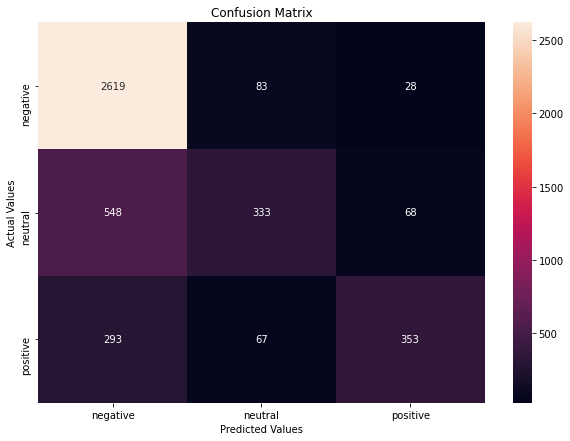

In [86]:
cm_matrix = pd.DataFrame(cm, index = ['negative', 'neutral', 'positive'], columns = ['negative', 'neutral', 'positive'])

#Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 4.  Display the POS tagging on the first 4 rows of ‘text’ (4 Marks)

In [87]:
def display_posTag(col_name):
    for index, row in df_read.iloc[:4].iterrows():
        indx_num = df_read.columns.get_loc(col_name)
        data = row[indx_num]
        print('############ the POS tagging for the row: ############')
        word_token =nltk.word_tokenize(str(data))
        print(nltk.pos_tag(word_token))
        print("#################################################################################################")

In [88]:
#pos tagging for original tweet - df column : text
display_posTag('text')


############ the POS tagging for the row: ############
[('@', 'NN'), ('VirginAmerica', 'NNP'), ('What', 'WP'), ('@', 'NNP'), ('dhepburn', 'NN'), ('said', 'VBD'), ('.', '.')]
#################################################################################################
############ the POS tagging for the row: ############
[('@', 'NN'), ('VirginAmerica', 'NNP'), ('plus', 'CC'), ('you', 'PRP'), ("'ve", 'VBP'), ('added', 'VBN'), ('commercials', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('experience', 'NN'), ('...', ':'), ('tacky', 'NN'), ('.', '.')]
#################################################################################################
############ the POS tagging for the row: ############
[('@', 'NN'), ('VirginAmerica', 'NNP'), ('I', 'PRP'), ('did', 'VBD'), ("n't", 'RB'), ('today', 'NN'), ('...', ':'), ('Must', 'NNP'), ('mean', 'VB'), ('I', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('take', 'VB'), ('another', 'DT'), ('trip', 'NN'), ('!', '.')]
#######################################

In [89]:
##pos tagging for clean tweet - df column : clean_data
display_posTag('clean_data') 

############ the POS tagging for the row: ############
[('virginamerica', 'NN'), ('dhepburn', 'NN'), ('said', 'VBD')]
#################################################################################################
############ the POS tagging for the row: ############
[('virginamerica', 'NN'), ('plus', 'CC'), ('added', 'JJ'), ('commercials', 'NNS'), ('experience', 'NN'), ('tacky', 'NN')]
#################################################################################################
############ the POS tagging for the row: ############
[('virginamerica', 'NN'), ('today', 'NN'), ('must', 'MD'), ('mean', 'VB'), ('need', 'MD'), ('take', 'VB'), ('another', 'DT'), ('trip', 'NN')]
#################################################################################################
############ the POS tagging for the row: ############
[('virginamerica', 'NNS'), ('really', 'RB'), ('aggressive', 'JJ'), ('blast', 'NN'), ('obnoxious', 'JJ'), ('entertainment', 'NN'), ('guests', 'NNS'), ('faces', 

#### 5. Build and display a dependency parser tree for the sentence: “Ned's eldest son, Robb, gathered an army and rose up in rebellion against the Lannisters, trying to win the independence of his kingdom.”  (2 Marks) 

In [90]:

doc = nlp("Ned's eldest son, Robb, gathered an army and rose up in rebellion against the Lannisters, trying to win the independence of his kingdom.")
print(displacy.render((doc),jupyter=True))

None
